## mitransient-tal-converter: reconstruction examples

As reconstructione examples, we will use two different scenes from the example notebooks in
[mitransient](https://github.com/diegoroyo/mitransient/blob/main/examples/transient-nlos/2-complex-nlos-scenes.ipynb),
a simple scene that only contains the relay wall and a hidden Z (*left*), and a more complex one that adds a room with floor and walls (*right*).
While the first scene is easily created using TAL's simulation capabilities, the room scene would be much harder to recreate.
However, by using mitransient, the room scene can be easily modeled using Blender, and then exported to a compatible XML
file (for more details about this process, check the [tutorial](https://github.com/diegoroyo/mitransient/blob/main/examples/transient-nlos/2-complex-nlos-scenes.ipynb)).
We provide the XML files of the scenes in the ```examples``` folder.

<div style="text-align: center;">
<img alt="Recreation of a simple NLOS scene in Blender" src="examples/images/nlos-z-simple-preview.png" width="400">
<img alt="Recreation of a more complex NLOS scene in Blender" src="examples/images/nlos-z-room-preview.png" width="400">
</div>

To reconstruct the scenes, you will first need to run the converter to perform the simulation and store it as a TAL compatible HDF5.
For the simple scene do:
```
python mitransient-tal-converter.py examples/nlos-z.xml -o examples/single.hdf5
python mitransient-tal-converter.py examples/nlos-z-confocal.xml -o examples/confocal.hdf5
```

And for the room scene:
```
python mitransient-tal-converter.py examples/nlos-z-room.xml -o examples/single-room.hdf5
python mitransient-tal-converter.py examples/nlos-z-room-confocal.xml -o examples/confocal-room.hdf5
```
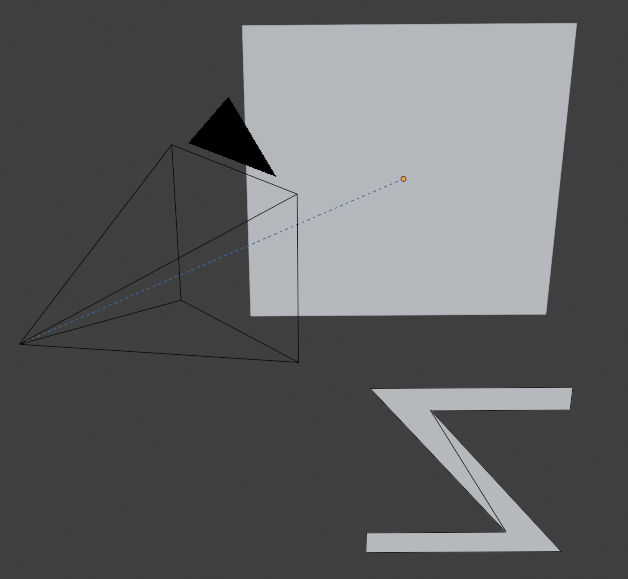
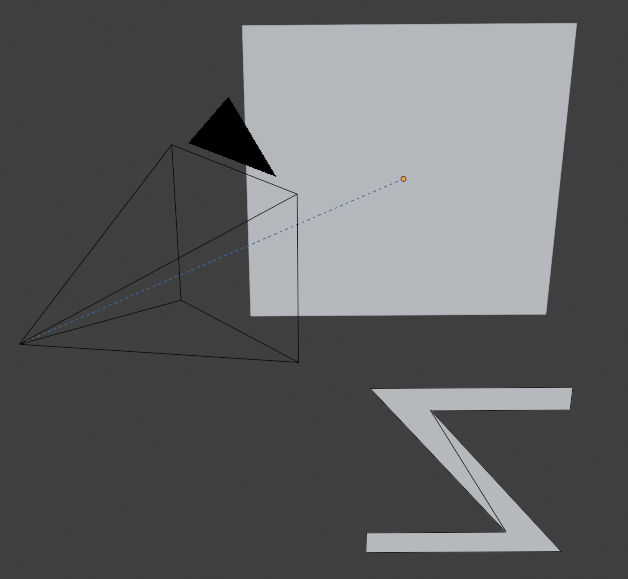
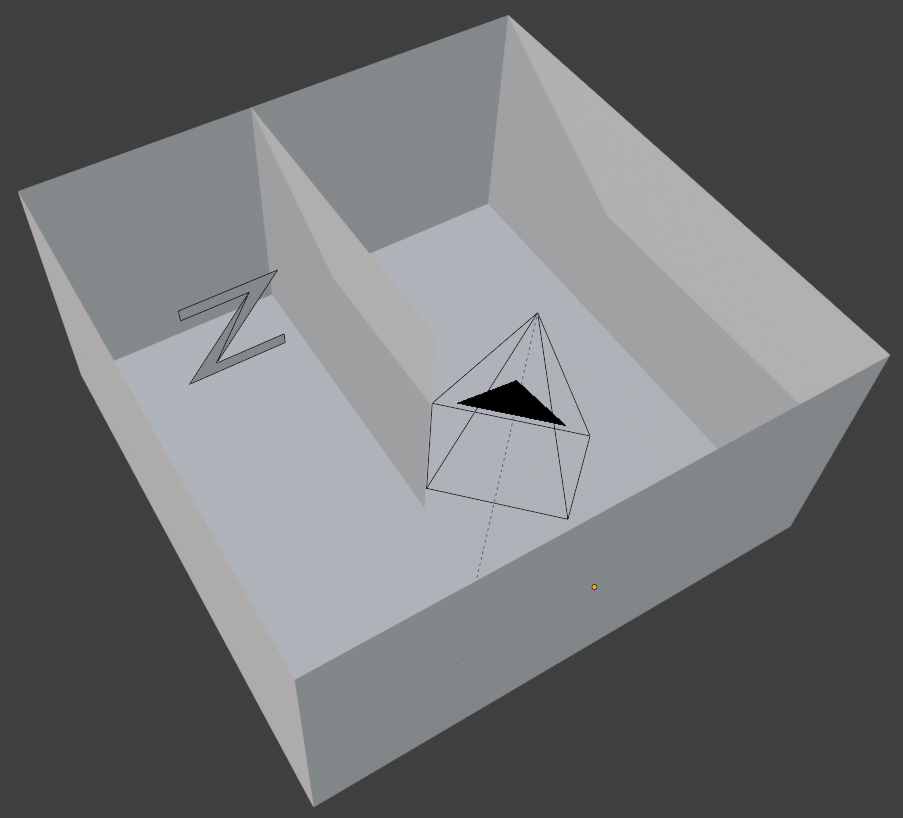

### Simple scene

In [1]:
import tal
from tal.io import read_capture
from tal.reconstruct import bp, fbp, get_volume_min_max_resolution
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the rendered HDF5 capture files
capture_single = read_capture('examples/single.hdf5')
capture_confocal = read_capture('examples/confocal.hdf5')

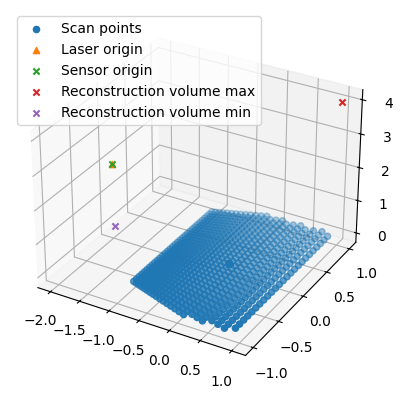

In [3]:
# Define the reconstruction volume
volume_max = np.array([1.0, 1.0, 4.0])
volume_min = np.array([-1.0, -1.0, 2.0])
volume_xyz = get_volume_min_max_resolution(maximal_pos=volume_max, minimal_pos=volume_min, resolution=0.05)

# Plot the positions of the scanned points and the reconstruction volume
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(capture_single.sensor_grid_xyz[..., 0], capture_single.sensor_grid_xyz[..., 1], capture_single.sensor_grid_xyz[..., 2],
           label='Scan points', marker='o')
ax.scatter(capture_single.laser_xyz[..., 0], capture_single.laser_xyz[..., 1], capture_single.laser_xyz[..., 2],
           label='Laser origin', marker='^')
ax.scatter(capture_single.sensor_xyz[..., 0], capture_single.sensor_xyz[..., 1], capture_single.sensor_xyz[..., 2],
           label='Sensor origin', marker='x')
ax.scatter(volume_max[0], volume_max[1], volume_max[2], label='Reconstruction volume max', marker='x')
ax.scatter(volume_min[0], volume_min[1], volume_min[2], label='Reconstruction volume min', marker='x')
plt.legend(); plt.show()

In [4]:
def reconstruct(capture, volume_xyz, capture_name, wl_mean=0.06, wl_sigma=0.06):
    # Reconstruct the capture
    recon = bp.solve(capture, volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
    recon_filtered = fbp.solve(capture, volume_xyz=volume_xyz,
                        camera_system=tal.enums.CameraSystem.DIRECT_LIGHT, wl_mean=wl_mean, wl_sigma=wl_sigma)

    # Swapaxes so the Z is correctly oriented in the plot
    recon = np.swapaxes(recon, 0, 1)
    recon_filtered = np.swapaxes(recon_filtered, 0, 1)

    # Show the reconstructions
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(7.5, 4.5))
    ax[0].imshow(recon.max(axis=2), cmap='inferno'); ax[0].axis('off'); ax[0].set_title('Backprojection')
    ax[1].imshow(np.absolute(recon_filtered).max(axis=2), cmap='inferno'); ax[1].axis('off'); ax[1].set_title('Filtered Backprojection')
    plt.suptitle(f'{capture_name} capture reconstruction'); plt.tight_layout(); plt.show()

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.filter_H: Using wavelengths from 0.0339m to 0.2520m
tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00, 199.24it/s]


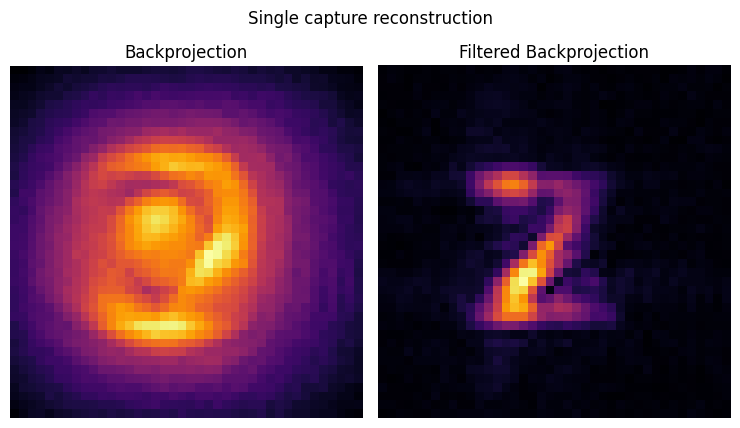

In [5]:
reconstruct(capture_single, volume_xyz, 'Single', wl_mean=0.06, wl_sigma=0.04)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.filter_H: Using wavelengths from 0.0512m to 0.4180m
tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00, 158.01it/s]


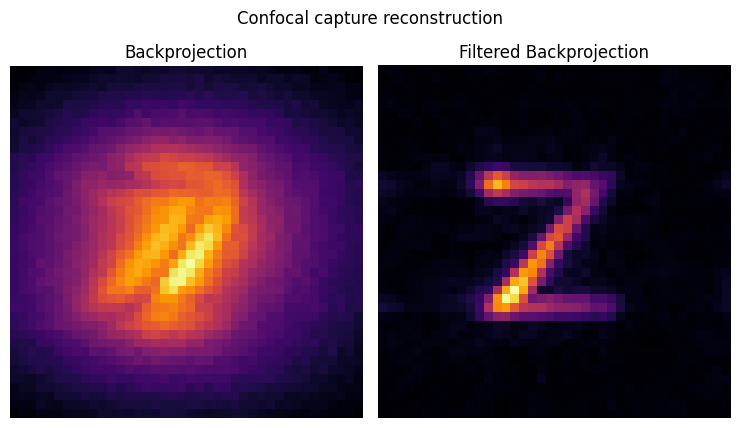

In [6]:
reconstruct(capture_confocal, volume_xyz, 'Confocal', wl_mean=0.09, wl_sigma=0.06)

## Room scene

The reconstruction results are very similar to the simple scene, with a few differences caused mostly by the walls of the room.

In [7]:
capture_single_room = read_capture('examples/single-room.hdf5')
capture_confocal_room = read_capture('examples/confocal-room.hdf5')

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.filter_H: Using wavelengths from 0.0339m to 0.2520m
tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00, 238.62it/s]


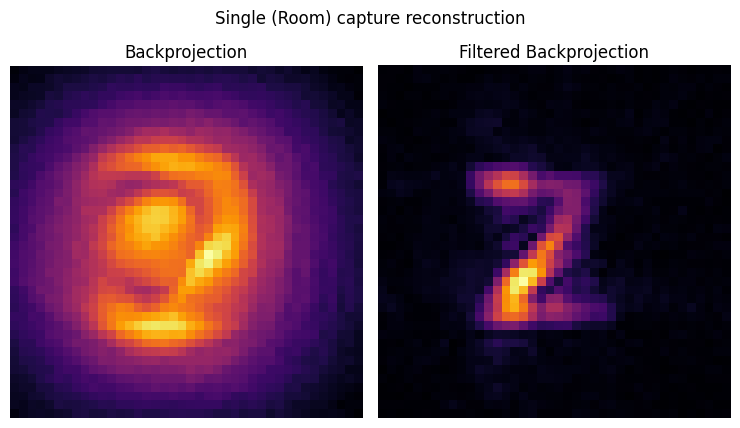

In [8]:
reconstruct(capture_single_room, volume_xyz, 'Single (Room)', wl_mean=0.06, wl_sigma=0.04)

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.filter_H: Using wavelengths from 0.0512m to 0.4180m
tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3


tal.reconstruct.filter_H (pf, 3/3): 100%|██████████| 3/3 [00:00<00:00, 172.41it/s]


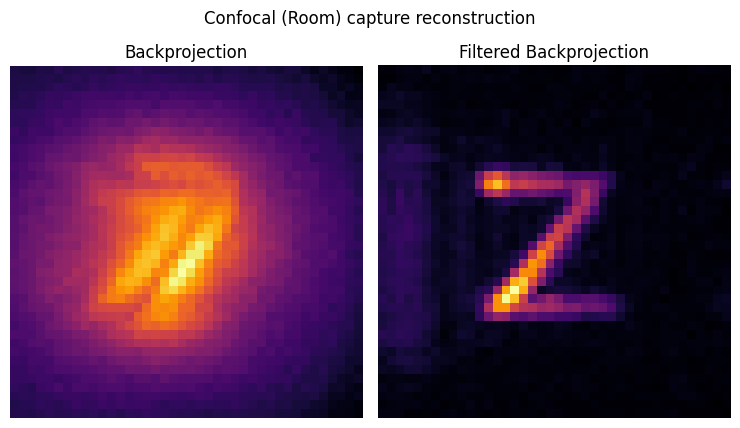

In [9]:
reconstruct(capture_confocal_room, volume_xyz, 'Confocal (Room)', wl_mean=0.09, wl_sigma=0.06)